In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# To display metrics with 3 decimal precision
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [2]:
# Load dataset
data = pd.read_csv('/Users/shailtp/Downloads/e1 positive.csv') 

# Features (X) and Target (y) separation
X = data.drop(columns=['Label'])
y = data['Label']

In [3]:
# Initialize Random Forest Classifier with 1000 trees and OOB enabled
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42, oob_score=False)

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the current fold
    rf_clf.fit(X_train_cv, y_train_cv)
    y_pred_cv = rf_clf.predict(X_test_cv)

    # Calculate confusion matrix and metrics for the current fold
    conf_matrix_cv = confusion_matrix(y_test_cv, y_pred_cv)
    accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)
    precision_cv = precision_score(y_test_cv, y_pred_cv)
    recall_cv = recall_score(y_test_cv, y_pred_cv)
    f1_cv = f1_score(y_test_cv, y_pred_cv)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix_cv.ravel()
    specificity_cv = tn / (tn + fp)

    fold_metrics.append({
        "Fold": fold,
        "Confusion Matrix": conf_matrix_cv,
        "Accuracy": accuracy_cv,
        "Precision": precision_cv,
        "Recall": recall_cv,
        "F1 Score": f1_cv,
        "Specificity": specificity_cv
    })

# Display metrics for each fold and calculate the average
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
specificity_list = []

for metrics in fold_metrics:
    print(f"Fold {metrics['Fold']} Confusion Matrix:")
    print(pd.DataFrame(metrics['Confusion Matrix'], 
                       index=['Actual Negative', 'Actual Positive'], 
                       columns=['Predicted Negative', 'Predicted Positive']))
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(f"Precision: {metrics['Precision']:.3f}")
    print(f"Recall: {metrics['Recall']:.3f}")
    print(f"F1 Score: {metrics['F1 Score']:.3f}")
    print(f"Specificity: {metrics['Specificity']:.3f}")
    print("\n")

    accuracy_list.append(metrics['Accuracy'])
    precision_list.append(metrics['Precision'])
    recall_list.append(metrics['Recall'])
    f1_list.append(metrics['F1 Score'])
    specificity_list.append(metrics['Specificity'])

# Calculate average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracy_list):.3f}")
print(f"Average Precision: {np.mean(precision_list):.3f}")
print(f"Average Recall: {np.mean(recall_list):.3f}")
print(f"Average F1 Score: {np.mean(f1_list):.3f}")
print(f"Average Specificity: {np.mean(specificity_list):.3f}")

Fold 1 Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 115                   0
Actual Positive                   0                  60
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Specificity: 1.000


Fold 2 Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 113                   0
Actual Positive                   0                  61
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Specificity: 1.000


Fold 3 Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 109                   2
Actual Positive                   0                  63
Accuracy: 0.989
Precision: 0.969
Recall: 1.000
F1 Score: 0.984
Specificity: 0.982


Fold 4 Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 118                   2
Actual Positive                 

In [4]:
# Train the Random Forest on the entire dataset
rf_clf.fit(X, y)

# Predict on the entire dataset
y_pred_all = rf_clf.predict(X)

# Calculate Confusion Matrix and Metrics for the entire dataset
conf_matrix_all = confusion_matrix(y, y_pred_all)
accuracy_all = accuracy_score(y, y_pred_all)
precision_all = precision_score(y, y_pred_all)
recall_all = recall_score(y, y_pred_all)
f1_all = f1_score(y, y_pred_all)

# Specificity calculation
tn, fp, fn, tp = conf_matrix_all.ravel()
specificity_all = tn / (tn + fp)

# Display the confusion matrix and other metrics for the entire dataset
print("Confusion Matrix for Entire Dataset:")
print(pd.DataFrame(conf_matrix_all, 
                   index=['Actual Negative', 'Actual Positive'], 
                   columns=['Predicted Negative', 'Predicted Positive']))
print(f"Accuracy: {accuracy_all:.3f}")
print(f"Precision: {precision_all:.3f}")
print(f"Recall: {recall_all:.3f}")
print(f"F1 Score: {f1_all:.3f}")
print(f"Specificity: {specificity_all:.3f}")

Confusion Matrix for Entire Dataset:
                 Predicted Negative  Predicted Positive
Actual Negative                 572                   0
Actual Positive                   0                 299
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Specificity: 1.000


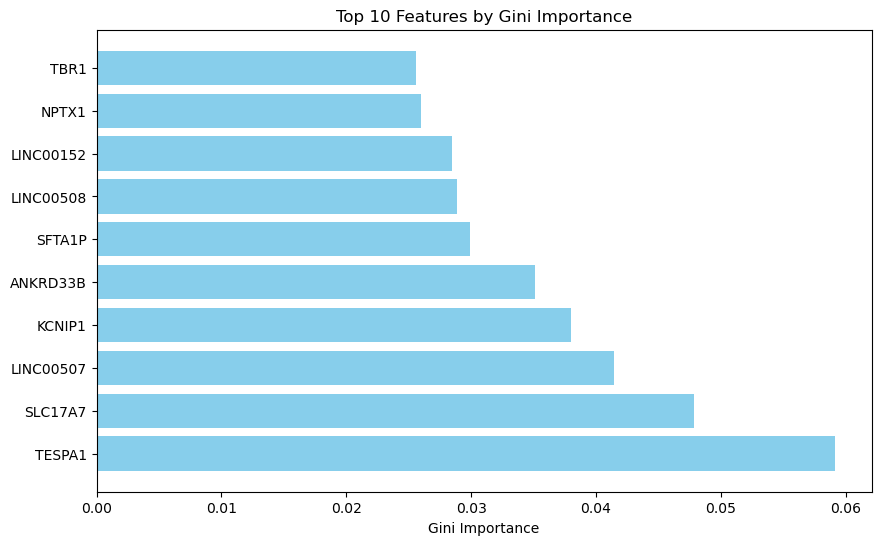

Top 10 Features by Gini Importance:
  Feature Name  Importance
9       TESPA1       0.059
8      SLC17A7       0.048
7    LINC00507       0.041
6       KCNIP1       0.038
5     ANKRD33B       0.035
4       SFTA1P       0.030
3    LINC00508       0.029
2    LINC00152       0.028
1        NPTX1       0.026
0         TBR1       0.026


In [5]:
# Extract feature importances and display the top 10
feature_importances = rf_clf.feature_importances_
sorted_idx = np.argsort(feature_importances)[-10:]  # Get indices of top 10 features

# Create a DataFrame for better readability
top_features_df = pd.DataFrame({
    'Feature Name': X.columns[sorted_idx],
    'Importance': feature_importances[sorted_idx]
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature Name'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Top 10 Features by Gini Importance')
plt.show()

# Print the feature importances
print("Top 10 Features by Gini Importance:")
print(top_features_df)


In [6]:
# Select one sample with a known positive label (1) and one with a negative label (0)
true_positive_sample = X[y == 1].iloc[0]  # Picking the first instance of class 1
true_negative_sample = X[y == 0].iloc[0]  # Picking the first instance of class 0

# Create a DataFrame to store these samples for easier prediction
test_samples = pd.DataFrame([true_positive_sample, true_negative_sample])
test_samples_labels = pd.Series([1, 0], index=[0, 1])  # Known labels for the selected samples

In [7]:
# Use the best-trained model to predict probabilities
predicted_probs = rf_clf.predict_proba(test_samples)

# Display the predicted probabilities
for i, probs in enumerate(predicted_probs):
    determined_class = int(probs[1] >= 0.5)  # Default cutoff of 0.5 for classifying
    print(f"Sample {i + 1}:")
    print(f"  True Label: {test_samples_labels[i]}")
    print(f"  Predicted Class: {determined_class}")
    print(f"  Probability for Class 0: {probs[0]:.3f}")
    print(f"  Probability for Class 1: {probs[1]:.3f}")
    print(f"  Correct Classification: {determined_class == test_samples_labels[i]}")
    print()


Sample 1:
  True Label: 1
  Predicted Class: 1
  Probability for Class 0: 0.007
  Probability for Class 1: 0.993
  Correct Classification: True

Sample 2:
  True Label: 0
  Predicted Class: 0
  Probability for Class 0: 0.993
  Probability for Class 1: 0.007
  Correct Classification: True

